In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import math
from enum import Enum
# from plotly.express import line
#import df
#import plotly.express as px
# %matplotlib inline 
sns.set(style="ticks")
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
encoding = 'windows-1250'
data=pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР4\supply_chain_data.csv', encoding = encoding)
data_train = pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР4\supply_chain_data.csv', sep=",")
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [4]:
data.shape

(100, 24)

In [5]:
data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
data_train

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.8080,55,802,8661.9968,Non-binary,58,7,96,4,Carrier B,2.9566,Supplier 3,Mumbai,29,215,29,46.2799,Pending,0.2264,Road,Route B,187.7521
1,skincare,SKU1,14.8435,95,736,7460.9001,Female,53,30,37,2,Carrier A,9.7166,Supplier 3,Mumbai,23,517,30,33.6168,Pending,4.8541,Road,Route B,503.0656
2,haircare,SKU2,11.3197,34,8,9577.7496,Unknown,1,10,88,2,Carrier B,8.0545,Supplier 1,Mumbai,12,971,27,30.6880,Pending,4.5806,Air,Route C,141.9203
3,skincare,SKU3,61.1633,68,83,7766.8364,Non-binary,23,13,59,6,Carrier C,1.7296,Supplier 5,Kolkata,24,937,18,35.6247,Fail,4.7466,Rail,Route A,254.7762
4,skincare,SKU4,4.8055,26,871,2686.5052,Non-binary,5,3,56,8,Carrier A,3.8905,Supplier 1,Delhi,5,414,3,92.0652,Fail,3.1456,Air,Route A,923.4406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.9039,65,672,7386.3639,Unknown,15,14,26,9,Carrier B,8.6303,Supplier 4,Mumbai,18,450,26,58.8907,Pending,1.2109,Air,Route A,778.8642
96,cosmetics,SKU96,24.4231,29,324,7698.4248,Non-binary,67,2,32,3,Carrier C,5.3529,Supplier 3,Mumbai,28,648,28,17.8038,Pending,3.8720,Road,Route A,188.7421
97,haircare,SKU97,3.5261,56,62,4370.9166,Male,46,19,4,9,Carrier A,7.9048,Supplier 4,Mumbai,10,535,13,65.7652,Fail,3.3762,Road,Route A,540.1324
98,skincare,SKU98,19.7546,43,913,8525.9526,Female,53,1,27,7,Carrier B,1.4098,Supplier 5,Chennai,28,581,9,5.6047,Pending,2.9081,Rail,Route A,882.1989


# Разделение выборки на обучающую и тестовую
*С использованием метода train_test_split*

In [7]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Подготовка данных
# Предположим, что мы хотим использовать признаки 'Price', 'Availability', 'Stock levels' для предсказания 'Product Type'
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели k-ближайших соседей
k = 3  # количество соседей
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3


In [8]:
# Создание переменных для обучающего и тестового наборов
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
# train_data
# test_data

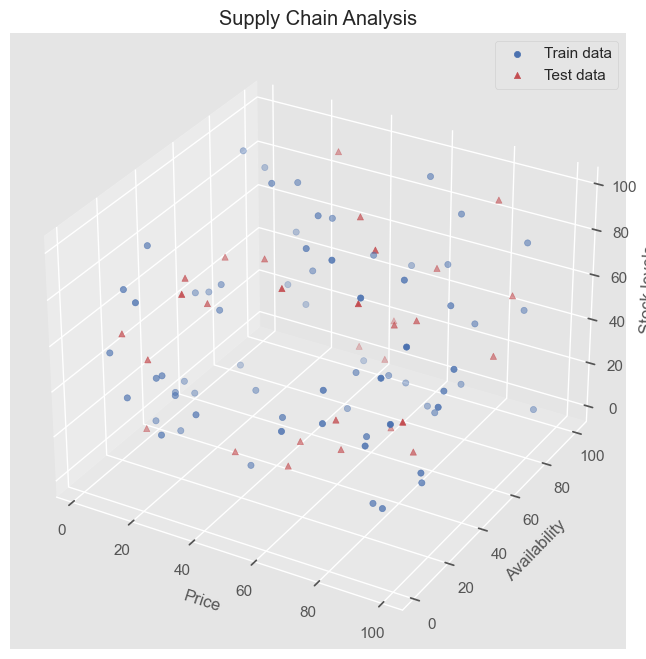

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Обучающая выборка
ax.scatter(X_train['Price'], X_train['Availability'], X_train['Stock levels'], c='b', marker='o', label='Train data')

# Тестовая выборка
ax.scatter(X_test['Price'], X_test['Availability'], X_test['Stock levels'], c='r', marker='^', label='Test data')

ax.set_xlabel('Price')
ax.set_ylabel('Availability')
ax.set_zlabel('Stock levels')
ax.set_title('Supply Chain Analysis')

plt.legend()
plt.show()

### Логическая Модель 

В случае регрессии, это означает, что мы пытаемся предсказать значение непрерывной зависимой переменной на основе линейной комбинации значений независимых переменных. 


### Логистическая регрессия / решение задачи классификации

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Подготовка данных
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели логистической регрессии
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model_log.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3


In [15]:
# Вывод коэффициентов модели
coefficients = model_log.coef_
intercept = model_log.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 0.00592586  0.00229954  0.02128748]
 [-0.00710965 -0.00107373 -0.00827464]
 [ 0.00118378 -0.00122581 -0.01301283]]
Intercept: [-1.65836318  0.80009796  0.85826523]


### Линейная регрессия / решение задачи регрессии

In [45]:
from sklearn.linear_model import LinearRegression

# Подготовка данных
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Revenue generated']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели линейной регрессии
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Предсказание значений для тестового набора данных
y_pred_linear = model_linear.predict(X_test)

# Оценка качества модели (например, средняя абсолютная ошибка)
from sklearn.metrics import mean_absolute_error
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print("Mean Absolute Error:", mae_linear)


Mean Absolute Error: 2590.450811818364


### Полиномиальная регрессия / решение задачи регрессиии

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# Подготовка данных
X_1 = data[['Price', 'Availability', 'Stock levels']]
y_1 = data['Revenue generated']

# Создание полиномиальных признаков
degree = 2  # степень полинома
poly_features = PolynomialFeatures(degree=degree)
X_poly_1 = poly_features.fit_transform(X_1)

# Разделение данных на тренировочный и тестовый наборы
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_poly_1, y_1, test_size=0.3, random_state=42)

# Инициализация и обучение модели полиномиальной регрессии
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_1_train, y_1_train)

# Предсказание значений для тестового набора данных
y_pred_poly = model_poly.predict(X_1_test)

# Оценка качества модели (например, средняя абсолютная ошибка)
from sklearn.metrics import mean_absolute_error
mae_poly = mean_absolute_error(y_1_test, y_pred_poly)
print("Mean Absolute Error (Polynomial Regression):", mae_poly)


Mean Absolute Error (Polynomial Regression): 4227.347507522646


### Модель SVM

In [16]:
from sklearn.svm import SVC

# Подготовка данных
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели SVM
model_svm = SVC(kernel='linear')  # Вы можете использовать различные ядра (например, 'linear', 'poly', 'rbf')
model_svm.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model_svm.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3333333333333333


In [17]:
# Вывод опорных векторов
support_vectors = model_svm.support_vectors_
print("Support vectors:", support_vectors)

# Вывод коэффициентов для опорных векторов (веса)
coefficients = model_svm.coef_
print("Coefficients for support vectors:", coefficients)


Support vectors: [[ 76.96299442  83.          15.        ]
 [  2.39727471  12.          48.        ]
 [ 84.95778682  11.          42.        ]
 [ 78.89791321  19.          97.        ]
 [ 42.95838438  59.          93.        ]
 [ 92.55736081  42.          47.        ]
 [ 81.46253437  82.          45.        ]
 [ 52.07593068  75.          69.        ]
 [ 68.71759675  78.           5.        ]
 [ 97.76008558  10.          90.        ]
 [ 14.20348426  91.          31.        ]
 [  3.03768872  97.          77.        ]
 [ 63.44755919   3.          45.        ]
 [ 84.89386898  60.          69.        ]
 [  4.32434119  30.          84.        ]
 [  6.38153316  14.          76.        ]
 [ 47.71423308  44.          90.        ]
 [ 69.290831    88.          63.        ]
 [  1.69997601  87.          90.        ]
 [ 77.90392722  65.          15.        ]
 [ 72.81920693   9.          48.        ]
 [ 39.62934399  73.          82.        ]
 [  4.15630836  32.           4.        ]
 [  6.30688318  5

### Дерево решений

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Подготовка данных
X = data[['Price', 'Availability', 'Stock levels']]
y = data['Product type']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Инициализация и обучение модели дерева решений
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

# Предсказание классов для тестового набора данных
y_pred = model_dt.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.36666666666666664


Feature Importance: [0.3816552  0.33155972 0.28678508]


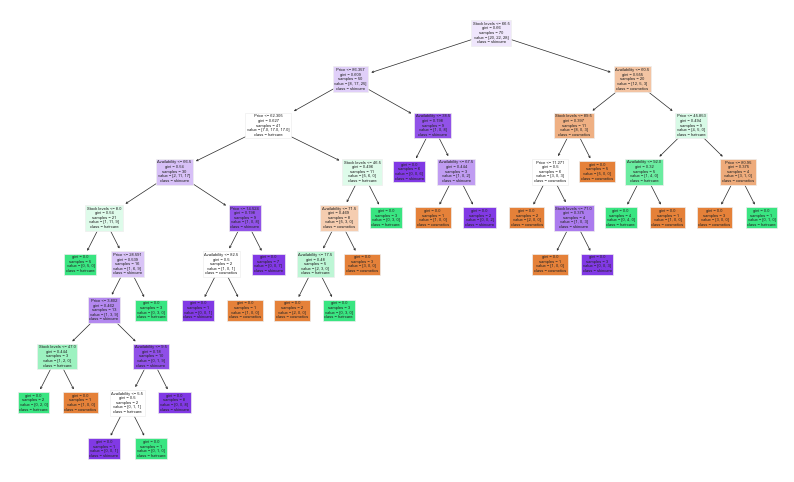

In [38]:
from sklearn.tree import plot_tree

# Вывод важности признаков
feature_importance = model_dt.feature_importances_
print("Feature Importance:", feature_importance)

# Вывод структуры дерева
plt.figure(figsize=(10, 6))
plot_tree(model_dt, feature_names=X.columns, class_names=model_dt.classes_, filled=True)
plt.show()


### Качество моделей

In [39]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score


# Предсказания для модели логистической регрессии
y_pred_lr = model_log.predict(X_test)

# Предсказания для модели SVM
y_pred_svm = model_svm.predict(X_test)

# Предсказания для модели дерева решений
y_pred_dt = model_dt.predict(X_test)


# Оценка модели логистической регрессии
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Оценка модели SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Оценка модели дерева решений
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Вывод результатов
print("Модель логистической регрессии:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("F1 Score:", f1_lr)
print()

print("Модель SVM:")
print("Accuracy:", accuracy_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)
print("Recall:", recall_svm)
print("Precision:", precision_svm)
print("F1 Score:", f1_svm)
print()

print("Модель дерева решений:")
print("Accuracy:", accuracy_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Recall:", recall_dt)
print("Precision:", precision_dt)
print("F1 Score:", f1_dt)


Модель логистической регрессии:
Accuracy: 0.3
Confusion Matrix:
[[2 1 3]
 [7 1 4]
 [4 2 6]]
Recall: 0.3
Precision: 0.3153846153846154
F1 Score: 0.28410526315789475

Модель SVM:
Accuracy: 0.3333333333333333
Confusion Matrix:
[[3 0 3]
 [7 0 5]
 [5 0 7]]
Recall: 0.3333333333333333
Precision: 0.22666666666666666
F1 Score: 0.26455026455026454

Модель дерева решений:
Accuracy: 0.36666666666666664
Confusion Matrix:
[[1 4 1]
 [5 4 3]
 [3 3 6]]
Recall: 0.36666666666666664
Precision: 0.4076767676767677
F1 Score: 0.38397891963109354


C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


По результатам анализа видно, что модель дерева решений демонстрирует наивысшее значение метрик Accuracy, Precision и F1 Score, что говорит о том, что она лучше других моделей справляется с задачей классификации. Однако, все модели показали относительно низкую точность, что может указывать на необходимость дополнительной настройки моделей или использования других методов обработки данных.

### График важности признаков в дереве решений

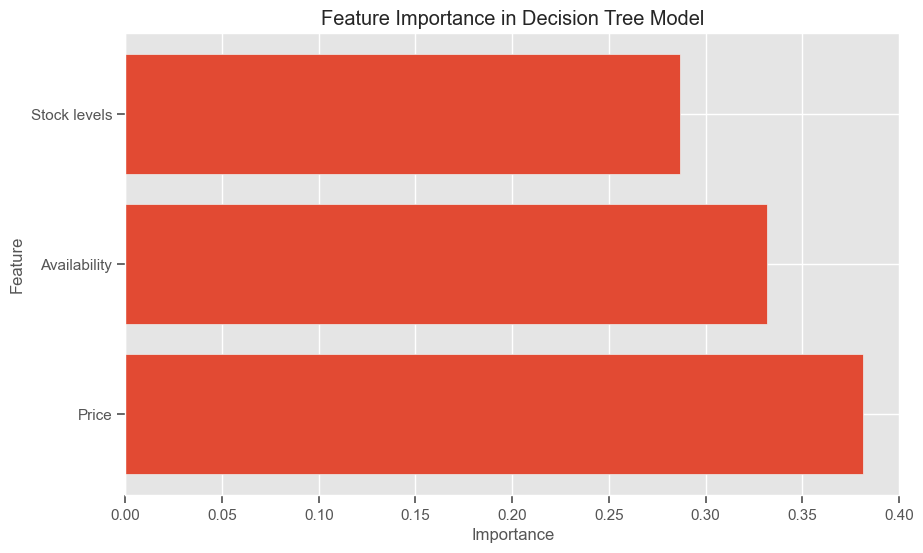

In [40]:
import matplotlib.pyplot as plt

# Получение важности признаков
feature_importance = model_dt.feature_importances_

# Названия признаков
feature_names = X.columns

# Создание графика
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


График 1.1

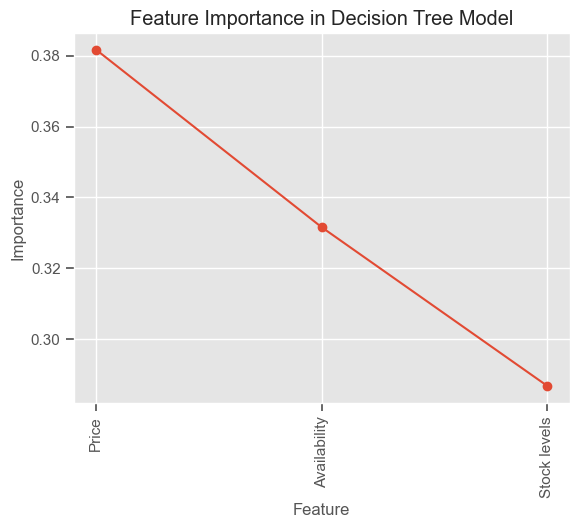

In [41]:
plt.plot(feature_names, feature_importance, marker='o')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.xticks(rotation=90)
plt.show()


График 1.2

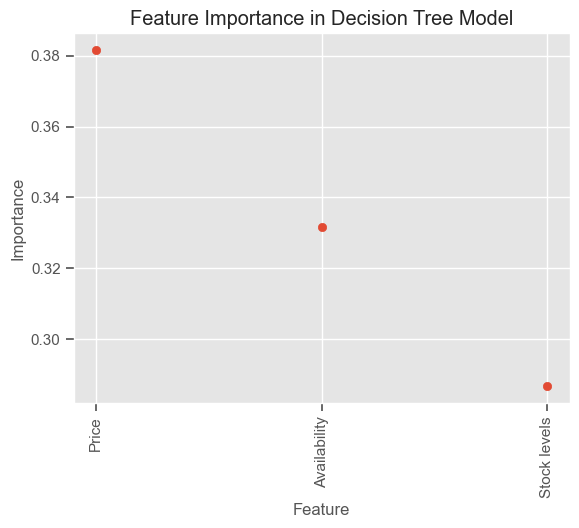

In [42]:
plt.scatter(feature_names, feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance in Decision Tree Model')
plt.xticks(rotation=90)
plt.show()


График 1.3

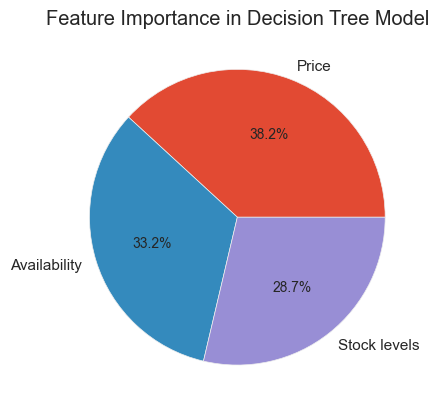

In [43]:
plt.pie(feature_importance, labels=feature_names, autopct='%1.1f%%')
plt.title('Feature Importance in Decision Tree Model')
plt.show()


# Дерево решений

In [44]:
from sklearn.tree import export_text

tree_rules = export_text(model_dt, feature_names=list(X.columns))
print(tree_rules)

|--- Stock levels <= 66.50
|   |--- Price <= 86.36
|   |   |--- Price <= 62.31
|   |   |   |--- Availability <= 66.50
|   |   |   |   |--- Stock levels <= 8.00
|   |   |   |   |   |--- class: haircare
|   |   |   |   |--- Stock levels >  8.00
|   |   |   |   |   |--- Price <= 28.59
|   |   |   |   |   |   |--- Price <= 3.80
|   |   |   |   |   |   |   |--- Stock levels <= 47.00
|   |   |   |   |   |   |   |   |--- class: haircare
|   |   |   |   |   |   |   |--- Stock levels >  47.00
|   |   |   |   |   |   |   |   |--- class: cosmetics
|   |   |   |   |   |   |--- Price >  3.80
|   |   |   |   |   |   |   |--- Availability <= 9.50
|   |   |   |   |   |   |   |   |--- Availability <= 5.50
|   |   |   |   |   |   |   |   |   |--- class: skincare
|   |   |   |   |   |   |   |   |--- Availability >  5.50
|   |   |   |   |   |   |   |   |   |--- class: haircare
|   |   |   |   |   |   |   |--- Availability >  9.50
|   |   |   |   |   |   |   |   |--- class: skincare
|   |   |   |   |   |--

In [61]:

from sklearn import tree
dot_data = tree.export_graphviz(tree_rules, out_file=None, 
                           feature_names=tree_rules.feature_names, 
                           class_names=tree_rules.target_names, 
                           filled=True, rounded=True, special_characters=True)  
graph = tree.graphviz.Source(dot_data)  
graph

AttributeError: 'str' object has no attribute 'feature_names'